In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

data = pd.read_csv("TexasStores.csv")
data2 = pd.read_csv("calendar.csv")





##Statement of Purpose

The goal of this project is to determine and forecast the sales of the Walmart store based out of Texas so as to optimize its sales strategy and increase the company's revenue. The predictions of the sales forecasts will be done using the data provided to us. The project results will help Walmart to develop efficient sales forecast and identify opportunities for growth.

##Introduction

Walmart Supercenters provide a one-stop shopping experience by fusing a grocery store with fresh produce, a bakery, a deli, and dairy goods with electronics, clothing, toys, and home furnishings. They are a popular chain of retail stores that offer a wide range of products and services, including groceries, clothing, electronics, home decor, and pharmacy services, among others. Walmart supercenters are well known for their large size and comprehensive selection of items, making them a one-stop shop for many customers. They are open 24 hours a day, seven days a week, and are located in various locations throughout the United States and other countries. With competitive pricing and a broad range of offerings, Walmart Supercenters have become a go-to destination for many shoppers due to its user friendly experience and convienience.

##Executive Summary
This project is for a new system that will help Walmart Supercenters in forecasting sales. With this project, we aim to improve the accuracy of sales forecasts, and potentially increase revenue.

The proposed system will utilize predictive analytics methods to analyze historical sales data and other relevant variables such as seasonality, and promotional events. This analysis will help to understand patterns and trends, that could be used to generate more accurate sales forecasts.

By utilizing this new system, Walmart Supercenters can anticipate future demand more effectively and adjust inventory levels accordingly, reducing waste and improving profitability. Additionally, with more accurate sales forecasts, the chain can make better decisions about pricing, promotions, and inventory management, that could lead to increased customer satisfaction and loyalty.

We believe that the implementation of this new system will lead to significant improvements in sales forecasting and inventory management, ultimately leading to increased revenue and profitability for Walmart Supercenters.



##Exploratory Data Analysis
We use the data given to perform data analysis and later create regression models that forecast sales. We begin by reading the data and showing it below in order to get a sense of the type of data we are working with.

We start by reading the `Texas Stores` data and displaying it below to understand the kind of data we are working with.

In [ ]:
data = pd.read_csv("TexasStores.csv")
data.head(n = 7)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_TX_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_1,TX,0,0,0,0,...,0,0,0,0,1,0,1,0,0,2
1,HOBBIES_1_002_TX_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,TX_1,TX,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,HOBBIES_1_003_TX_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,TX_1,TX,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_TX_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,TX_1,TX,1,2,1,0,...,0,3,2,0,1,0,0,0,2,2
4,HOBBIES_1_005_TX_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,TX_1,TX,0,0,0,0,...,1,2,2,0,0,2,3,0,5,2
5,HOBBIES_1_006_TX_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,TX_1,TX,0,0,0,0,...,0,1,1,0,0,0,1,0,0,1
6,HOBBIES_1_007_TX_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,TX_1,TX,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0


We also write in the code for reading the `Calendar` data and displaying it to understand the elements associated within this dataset.

In [ ]:
data2 = pd.read_csv("calendar.csv")
data2.head(n=10)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,1,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1
8,2011-02-06,11102,Sunday,2,2,2011,d_9,SuperBowl,Sporting,NaN,NaN,1,1,1
9,2011-02-07,11102,Monday,3,2,2011,d_10,NaN,NaN,NaN,NaN,1,1,0


##Descriptive Ananlysis

We use the code below in order to make the data display in the column format. This will provide us a simplistic overview of the data.

In [ ]:
data_long = data.melt(id_vars = ["id", "item_id", "dept_id", "cat_id", "store_id", "state_id"], var_name = "day", value_name = "QuantitySold")
data_long.head()

,id,item_id,dept_id,cat_id,store_id,state_id,day,QuantitySold
0,HOBBIES_1_001_TX_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_1,TX,d_1,0
1,HOBBIES_1_002_TX_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,TX_1,TX,d_1,0
2,HOBBIES_1_003_TX_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,TX_1,TX,d_1,0
3,HOBBIES_1_004_TX_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,TX_1,TX,d_1,1
4,HOBBIES_1_005_TX_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,TX_1,TX,d_1,0


In [ ]:
data_long[["item_id", "store_id", "QuantitySold"]].groupby(["item_id", "store_id"], as_index = False).agg("mean").sort_values("QuantitySold")

,item_id,store_id,QuantitySold
860,FOODS_2_071,TX_3,0.008364
1270,FOODS_2_209,TX_2,0.012546
5631,HOBBIES_2_025,TX_1,0.014637
8610,HOUSEHOLD_2_338,TX_1,0.014637
4941,HOBBIES_1_217,TX_1,0.014637
...,...,...,...
2593,FOODS_3_252,TX_2,59.672243
2108,FOODS_3_090,TX_3,60.038683
2107,FOODS_3_090,TX_2,62.465238
3596,FOODS_3_586,TX_3,78.474647


In [ ]:
foods_586 = data_long[(data_long["item_id"] == "FOODS_3_586") & (data_long["store_id"] == "TX_2")]
foods_586.head()

,id,item_id,dept_id,cat_id,store_id,state_id,day,QuantitySold
5859,FOODS_3_586_TX_2_validation,FOODS_3_586,FOODS_3,FOODS,TX_2,TX,d_1,98
15006,FOODS_3_586_TX_2_validation,FOODS_3_586,FOODS_3,FOODS,TX_2,TX,d_2,85
24153,FOODS_3_586_TX_2_validation,FOODS_3_586,FOODS_3,FOODS,TX_2,TX,d_3,47
33300,FOODS_3_586_TX_2_validation,FOODS_3_586,FOODS_3,FOODS,TX_2,TX,d_4,56
42447,FOODS_3_586_TX_2_validation,FOODS_3_586,FOODS_3,FOODS,TX_2,TX,d_5,51


Moving on, in order to get an idea on the items that sell on a larger quantity, we use the code below to get information of the the `item id` and its `selling count`.

In [ ]:
data_long["item_id"].value_counts()

HOBBIES_1_001      5739
FOODS_2_210        5739
FOODS_2_201        5739
FOODS_2_202        5739
FOODS_2_203        5739
                   ... 
HOUSEHOLD_1_464    5739
HOUSEHOLD_1_465    5739
HOUSEHOLD_1_466    5739
HOUSEHOLD_1_467    5739
FOODS_3_827        5739
Name: item_id, Length: 3049, dtype: int64

The values in the data long DataFrame are grouped by `item id` using the code below. The mean value of the `QuantitySold` column is then calculated for each group, and the resulting DataFrame is sorted in ascending order by `QuantitySold`.

This code will produce a DataFrame with two columns: `item id` and `quantity sold`, where each row corresponds to an item id and its mean quantity sold value. The items with the lowest mean `QuantitySold` values will appear first in the DataFrame, which will be sorted in ascending order of the mean QuantitySold value.

In [ ]:
data_long[["item_id", "QuantitySold"]].groupby("item_id").agg("mean").sort_values("QuantitySold")

,QuantitySold
item_id,
HOUSEHOLD_2_101,0.019341
FOODS_3_171,0.020561
FOODS_2_071,0.021955
HOBBIES_1_217,0.024917
HOUSEHOLD_2_077,0.025963
...,...
FOODS_3_377,28.746472
FOODS_3_555,42.635477
FOODS_3_252,44.795086


Now, that we have an idea on which `item_id` is sold in the highest quantity, we proceed further to plot graphs based on this information. 

To start with, we filter the data long DataFrame using the code below to choose just the rows where the item id column is "FOODS 3 586" and the store id column equals "TX 1". The variable `my single data` is given the resulting DataFrame with the filtered data in it.

We will then use the `Python Matplotlib` package to construct a line plot of the `QuantitySold` column in the my single data DataFrame.

In [ ]:
my_single_data = data_long[(data_long["item_id"] == "FOODS_3_586") & (data_long["store_id"] == "TX_1")]
my_single_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,day,QuantitySold
2810,FOODS_3_586_TX_1_validation,FOODS_3_586,FOODS_3,FOODS,TX_1,TX,d_1,53
11957,FOODS_3_586_TX_1_validation,FOODS_3_586,FOODS_3,FOODS,TX_1,TX,d_2,46
21104,FOODS_3_586_TX_1_validation,FOODS_3_586,FOODS_3,FOODS,TX_1,TX,d_3,42
30251,FOODS_3_586_TX_1_validation,FOODS_3_586,FOODS_3,FOODS,TX_1,TX,d_4,45
39398,FOODS_3_586_TX_1_validation,FOODS_3_586,FOODS_3,FOODS,TX_1,TX,d_5,28


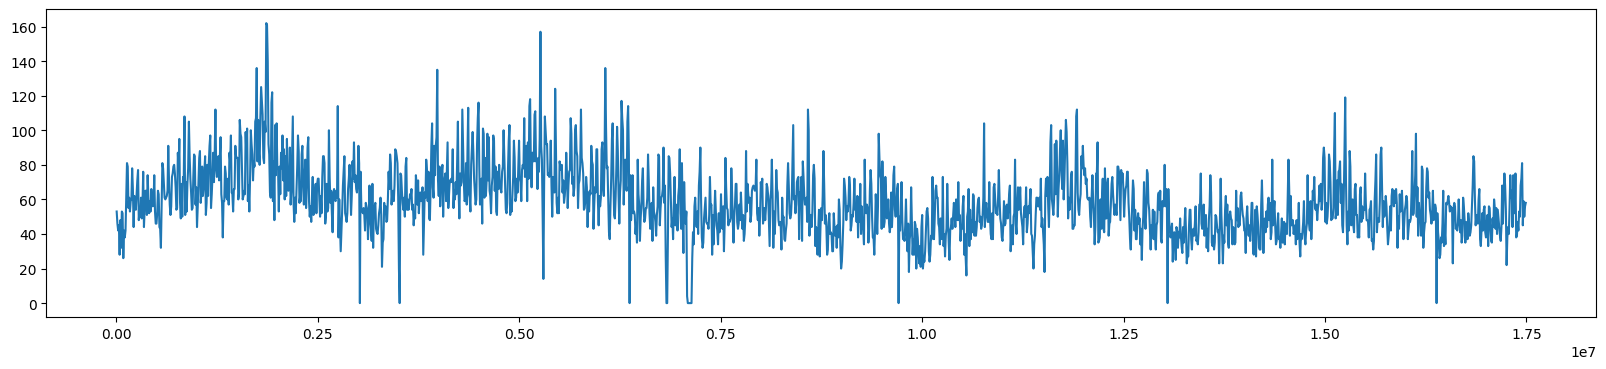

In [ ]:
plt.figure(figsize = (20, 4))
plt.plot(my_single_data["QuantitySold"])

In [ ]:
my_single_data = data_long[(data_long["item_id"] == "FOODS_3_586") & (data_long["store_id"] == "TX_2")]
my_single_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,day,QuantitySold
5859,FOODS_3_586_TX_2_validation,FOODS_3_586,FOODS_3,FOODS,TX_2,TX,d_1,98
15006,FOODS_3_586_TX_2_validation,FOODS_3_586,FOODS_3,FOODS,TX_2,TX,d_2,85
24153,FOODS_3_586_TX_2_validation,FOODS_3_586,FOODS_3,FOODS,TX_2,TX,d_3,47
33300,FOODS_3_586_TX_2_validation,FOODS_3_586,FOODS_3,FOODS,TX_2,TX,d_4,56
42447,FOODS_3_586_TX_2_validation,FOODS_3_586,FOODS_3,FOODS,TX_2,TX,d_5,51


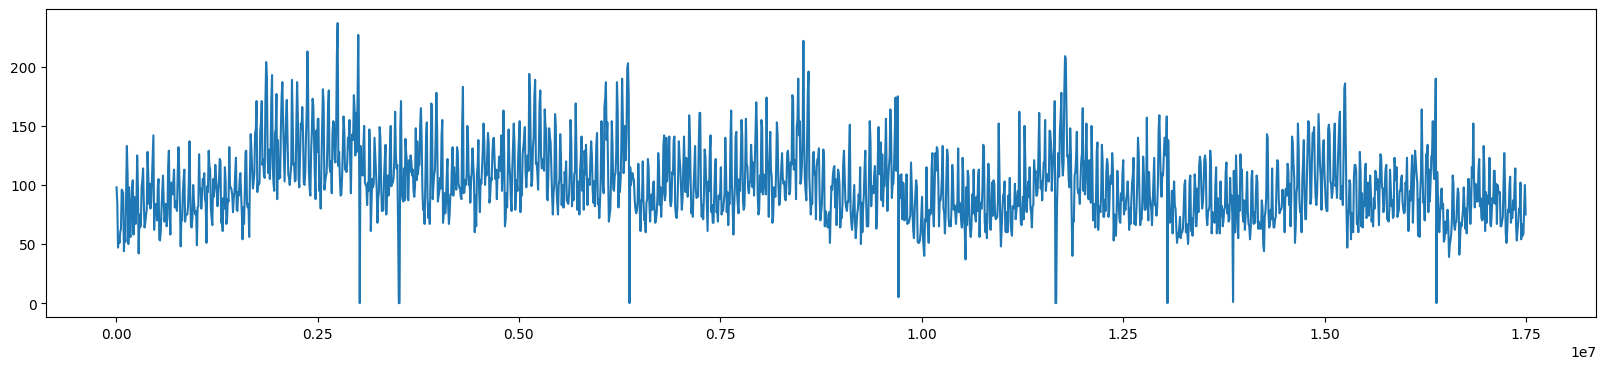

In [ ]:
plt.figure(figsize = (20, 4))
plt.plot(my_single_data["QuantitySold"])

In [ ]:
my_single_data = data_long[(data_long["item_id"] == "FOODS_3_586") & (data_long["store_id"] == "TX_3")]
my_single_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,day,QuantitySold
8908,FOODS_3_586_TX_3_validation,FOODS_3_586,FOODS_3,FOODS,TX_3,TX,d_1,115
18055,FOODS_3_586_TX_3_validation,FOODS_3_586,FOODS_3,FOODS,TX_3,TX,d_2,116
27202,FOODS_3_586_TX_3_validation,FOODS_3_586,FOODS_3,FOODS,TX_3,TX,d_3,71
36349,FOODS_3_586_TX_3_validation,FOODS_3_586,FOODS_3,FOODS,TX_3,TX,d_4,66
45496,FOODS_3_586_TX_3_validation,FOODS_3_586,FOODS_3,FOODS,TX_3,TX,d_5,66


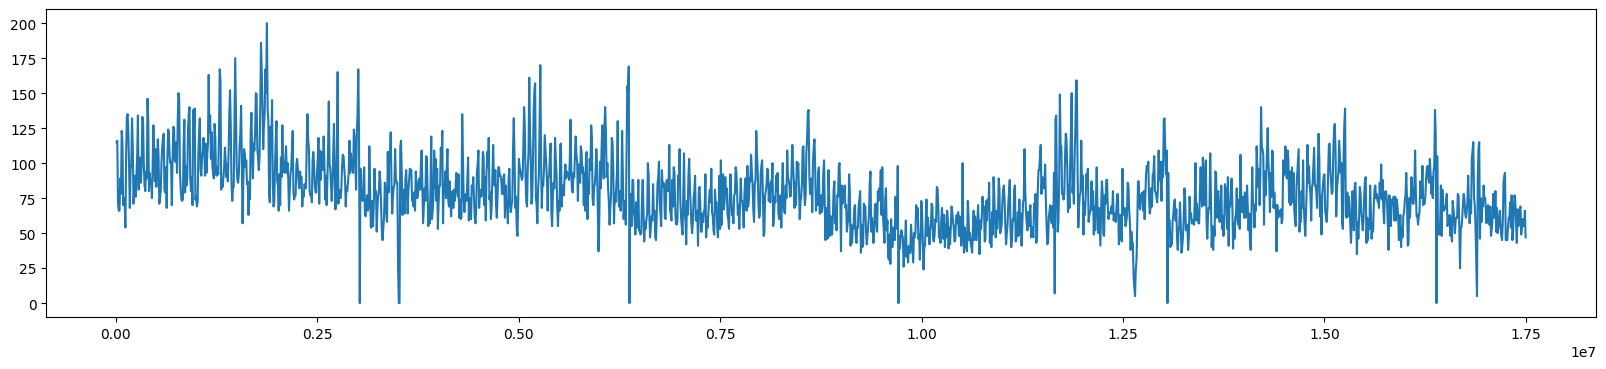

In [ ]:
plt.figure(figsize = (20, 4))
plt.plot(my_single_data["QuantitySold"])

In [ ]:
my_single_data = data_long[(data_long["item_id"] == "FOODS_3_090") & (data_long["store_id"] == "TX_3")]
my_single_data.head()

,id,item_id,dept_id,cat_id,store_id,state_id,day,QuantitySold
8412,FOODS_3_090_TX_3_validation,FOODS_3_090,FOODS_3,FOODS,TX_3,TX,d_1,203
17559,FOODS_3_090_TX_3_validation,FOODS_3_090,FOODS_3,FOODS,TX_3,TX,d_2,112
26706,FOODS_3_090_TX_3_validation,FOODS_3_090,FOODS_3,FOODS,TX_3,TX,d_3,128
35853,FOODS_3_090_TX_3_validation,FOODS_3_090,FOODS_3,FOODS,TX_3,TX,d_4,76
45000,FOODS_3_090_TX_3_validation,FOODS_3_090,FOODS_3,FOODS,TX_3,TX,d_5,56


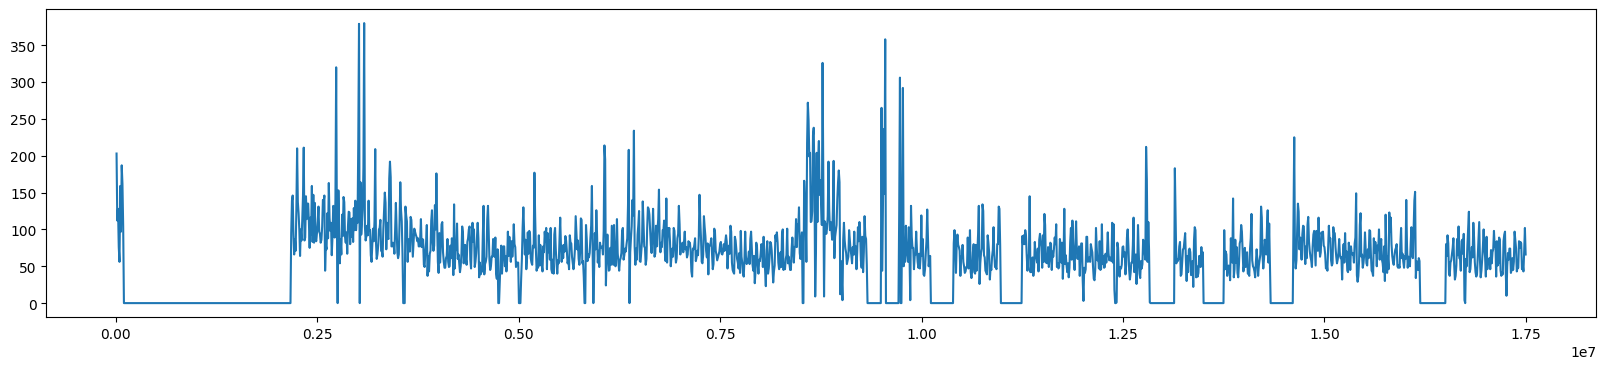

In [ ]:
plt.figure(figsize = (20, 4))
plt.plot(my_single_data["QuantitySold"])

From the graphs above, we come across the following observations.

1. The first three graphs show a similar trend. This shows that the foods with the same `item id` are sold at a similar fashion and price when placed in either `TX_1`, `TX_2` or `TX_3`. This means that irrespective of the location, the items are similarly sold, which means that the demand for these products remain the same across all locations.

2. The fourth graph, however, has a different trend as compared to the first three graphs. This is because we have used a food with a different `item_id` and analysed the number it has sold in `TX_3`. 

3. We now know that overall, the demand for all the products sold in supercenters are similar. This could potentially mean customers are confident that they receive the product in the same price no matter which store they buy it from. This is good as we could see an increase in customer loyalty and trust.

4. From these graphs, we can also identify the products that have the highest quantity sold across all stores, which can then be used to update the inventory so as to make sure that customer needs are met and that we do not run out of products.

The code below merges `Texas Stores` and `Calendar` datasets, which can be used to analyse both the datasets comnbined together. This will be useful in constructing effective models through regression.

In [ ]:
data_cleaned = my_single_data.merge(data2, how = "left", left_on = "day", right_on = "d")
data_cleaned = data_cleaned[["day", "QuantitySold", "wm_yr_wk", "weekday", "month", "year", "event_name_1", "event_type_1", "event_type_2", "snap_TX"]]

In [ ]:
data_cleaned["time_period"] = range(len(data_cleaned))

In [ ]:
data_cleaned.head()

,day,QuantitySold,wm_yr_wk,weekday,month,year,event_name_1,event_type_1,event_type_2,snap_TX
0,d_1,115,11101,Saturday,1,2011,NaN,NaN,NaN,0
1,d_2,116,11101,Sunday,1,2011,NaN,NaN,NaN,0
2,d_3,71,11101,Monday,1,2011,NaN,NaN,NaN,0
3,d_4,66,11101,Tuesday,2,2011,NaN,NaN,NaN,1
4,d_5,66,11101,Wednesday,2,2011,NaN,NaN,NaN,0


##Model Construction
To start with, we create a subset called `train1`, which drops columns we do not wish to use for regression such as `event_name_1`, `event_type_1`, etc. We remove `QuantitySold` from this subset as we wish to predict this variable using the other predictor variables.

In [ ]:
train1 = data_cleaned.drop(['QuantitySold', 'event_name_1', 'event_type_1', 'event_type_2', 'weekday', 'day'], axis=1)
y_train = data_cleaned["QuantitySold"]
train1.head()

,wm_yr_wk,month,year,snap_TX
0,11101,1,2011,0
1,11101,1,2011,0
2,11101,1,2011,0
3,11101,2,2011,1
4,11101,2,2011,0


Moving on, we go ahead with the regression model using the code below.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(train1, y_train)
y_train_pred = model.predict(train1)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = (train_mse)**0.5
print("Root mean squared error for training data:", train_rmse)

Root mean squared error for training data: 22.48276641815697


Here, we find that the `RMSE = 22.4`. While this could potentially be a good number to work with, we currently do not have anything to compare it with. Hence, we move ahead with creating a few more regression models that could help us in comparing and selecting the best model among them for final predictions. For further regression models, we would be moving ahead by removing 1 or 2 more columns to see if that creates a negative/positive impact on the RMSE.

In [ ]:
train2 = data_cleaned.drop(['QuantitySold', 'event_name_1', 'event_type_1', 'event_type_2', 'weekday', 'day', 'month'], axis=1)
y_train = data_cleaned["QuantitySold"]
model2 = LinearRegression()
model2.fit(train2, y_train)
y_train_pred = model2.predict(train2)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = (train_mse)**0.5
print("Root mean squared error for training data:", train_rmse)

Root mean squared error for training data: 22.533424209644487


In [ ]:
train3 = data_cleaned.drop(['QuantitySold', 'event_name_1', 'event_type_1', 'event_type_2', 'weekday', 'day', 'month', 'snap_TX'], axis=1)
y_train = data_cleaned["QuantitySold"]
model3 = LinearRegression()
model3.fit(train3, y_train)
y_train_pred = model3.predict(train3)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = (train_mse)**0.5
print("Root mean squared error for training data:", train_rmse)

Root mean squared error for training data: 22.632544304643723


From the above 3  constructions, following conclusions were noted:


1.   Model 1 has an RMSE of 22.48
2.   Model 2 has an RMSE of 22.53
3.   Model 3 has an RMSE of 22.63

In Model 1, we performed regression using all the predictor variables, except for those which are categorical variables and the response variable i.e. "QuantitySold". We observed the the RMSE obtained from this model is 22.48. 

In Model 2, we performed regression using only the following predictor variables - 'wm_yr_wk', 'year', 'snap_TX' and observed the the RMSE obtained from this model 2 was 22.53

Next, for model 3, we performed regression using only the following predictor variables - wm_yr_wk, and observed that the RMSE obtained from this model was 22.63

By comparing all the 3 models, we observe that Model 1 has the best RMSE of 22.48. Hence, we will use this model going forward as it provides us with the best predictions.

Now that we know that Model 1 is the best among all the models, we create another subset called `eval` that removes the columns not required to mimic the subset used in model 1. We then fit in our model in this dataset to predict the Quantity Sold.



In [ ]:
model.fit(train1, y_train)

LinearRegression()

In [ ]:
eval = data_cleaned.drop(['QuantitySold', 'event_name_1', 'event_type_1', 'event_type_2', 'weekday', 'day'], axis=1)
quantitysold = model.predict(eval)
quantitysold

array([90.85938476, 90.85938476, 90.85938476, ..., 59.79214473,
       60.06865982, 60.06865982])

##Conclusions

From the above predictions, we can draw the following conclusions-

- By increasing the quantity of the following 'item_id' - 'FOODS_3_586', Walmart can increase their sales and in turn gain more profits as this is the item that is observed to have highest demand. The quantity of this item can be increased across all the locations, as the graphs clearly shows that locations doesnt really affect the sale of a particular item.

- We also observed that the sales are highest during the weekends i.e Saturday and Sunday. This will be helpful for the inventory as the items can be stocked up in the inventory before the weekend.

- Also, as per the observations, we noticed that the items in the 'HOUSEHOLD' and 'HOBBIES' category are sold less comparatively. Hence, we can also eliminate the stock of these 'item_id' which has relatively less demand and so are not sold out much. Instead, the store can try introducing other category such as 'CLOTHING' category that will attract most of the people of all age groups.